# Evaluation de la qualité de vins rouges

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('winequality-red.csv', sep=";")

In [2]:
# Visualisation des données
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Extraction des données
X = data.as_matrix(data.columns[:-1])
y = data.as_matrix([data.columns[-1]])
y = y.flatten()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
X.shape

(1599, 11)

In [5]:
y.shape

(1599,)

In [6]:
# Analyse des notes possibles pour les vins
np.unique(y)

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [7]:
# Séparation des données en jeux d'entraînement et de test
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y,
                                test_size=0.25 # 25% des données dans le jeu de test
                                )

In [8]:
# Standardisation des données X
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

# Approche naïve

In [9]:
# Approche avec prédiction de la valeur moyenne
from sklearn import dummy
from sklearn.metrics import mean_squared_error, r2_score
dum = dummy.DummyRegressor(strategy='mean')

# Entraînement
dum.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred_dum = dum.predict(X_test)

# Evaluate
print("MSE : %.4f ; R² : %.4f" % (mean_squared_error(y_test, y_pred_dum), r2_score(y_test, y_pred_dum)))

MSE : 0.6315 ; R² : -0.0067


In [10]:
# Approche avec prédiction de valeurs aléatoires
y_pred_random = np.random.randint(np.min(y), np.max(y), y_test.shape)
print("MSE : %.4f ; R² : %.4f" % (mean_squared_error(y_test, y_pred_random), r2_score(y_test, y_pred_random)))

MSE : 2.9700 ; R² : -3.7342


# Fonction GridSearchCV "manuelle"

Nombre de voisins : 3
Numéro de fold de test : 1
MSE = 0.5296 ; R² = 0.1759
Numéro de fold de test : 2
MSE = 0.5176 ; R² = 0.2410
Numéro de fold de test : 3
MSE = 0.4995 ; R² = 0.2874
Numéro de fold de test : 4
MSE = 0.4380 ; R² = 0.2327
Numéro de fold de test : 5
MSE = 0.5728 ; R² = 0.1763
MSE = 0.5115 ; R² = 0.2227
Nombre de voisins : 5
Numéro de fold de test : 1
MSE = 0.4927 ; R² = 0.2335
Numéro de fold de test : 2
MSE = 0.4855 ; R² = 0.2880
Numéro de fold de test : 3
MSE = 0.4667 ; R² = 0.3343
Numéro de fold de test : 4
MSE = 0.4198 ; R² = 0.2645
Numéro de fold de test : 5
MSE = 0.5449 ; R² = 0.2163
MSE = 0.4819 ; R² = 0.2673
Nombre de voisins : 7
Numéro de fold de test : 1
MSE = 0.4958 ; R² = 0.2285
Numéro de fold de test : 2
MSE = 0.4802 ; R² = 0.2958
Numéro de fold de test : 3
MSE = 0.4572 ; R² = 0.3478
Numéro de fold de test : 4
MSE = 0.4221 ; R² = 0.2605
Numéro de fold de test : 5
MSE = 0.4891 ; R² = 0.2966
MSE = 0.4689 ; R² = 0.2859
Nombre de voisins : 9
Numéro de fold de tes

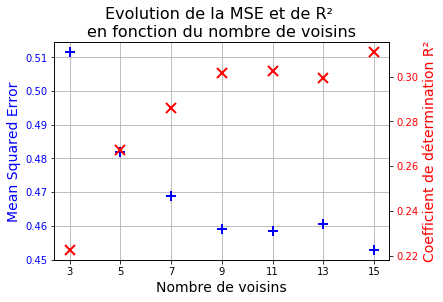

Liste MSE : [0.5114958158995815, 0.48192078103207814, 0.4688939885577662, 0.45911010382767703, 0.4584986802217689, 0.46054999876210057, 0.4528524717185805]
Liste R² : [0.2226855628945504, 0.26733132985745073, 0.2858557600171725, 0.3015304408651295, 0.30269688268710526, 0.29918565935174535, 0.3108498324336507]
Meilleur hyperparamètre : 15
MSE = 0.4529 ; R² = 0.3108


In [11]:
from knn_regressor_fonction import Validation_croisee

# Choix des hyperparamètres, ici le nombre de voisins :
n_neighbors = [3, 5, 7, 9, 11, 13, 15]

# Choix du nombre de folds :
cv = 5

# Renvoi du k-voisins optimal à l'aide de la fonction de validation croisée
K_opt = Validation_croisee(X_train, y_train, n_neighbors, cv)

In [12]:
# Test du modèle le plus performant
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = K_opt)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Meilleur hyperparamètre : {}".format(K_opt))
print("\nSur le jeu de test : MSE = {:0.4f} ; R² = {:0.4f}".format(MSE, r2))

Meilleur hyperparamètre : 15

Sur le jeu de test : MSE = 0.4136 ; R² = 0.3407


# Fonction GridsearchCV

In [13]:
from sklearn import model_selection
from sklearn import neighbors, metrics
from math import *

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = "neg_mean_squared_error"

# Non randomisation des folds (shuffle est normalement "False" par défaut)
cv_GridSearch=model_selection.KFold(n_splits=5,shuffle=False)

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(neighbors.KNeighborsRegressor(), # un classifieur kNN
param_grid, # hyperparamètres à tester
cv=cv_GridSearch, # nombre de folds de validation croisée
scoring=score # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:"),
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(clf.cv_results_['mean_test_score'], # score moyen
clf.cv_results_['std_test_score'], # écart-type du score
clf.cv_results_['params'] # valeur de l'hyperparamètre
):
    print("\tMSE = %0.3f (+/-%0.03f) for %r" % (
    abs(mean), # score moyen
    std * 2, # barre d'erreur
    params # hyperparamètre
    ))

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 15}
Résultats de la validation croisée :
	MSE = 0.511 (+/-0.088) for {'n_neighbors': 3}
	MSE = 0.482 (+/-0.081) for {'n_neighbors': 5}
	MSE = 0.469 (+/-0.054) for {'n_neighbors': 7}
	MSE = 0.459 (+/-0.066) for {'n_neighbors': 9}
	MSE = 0.458 (+/-0.065) for {'n_neighbors': 11}
	MSE = 0.461 (+/-0.057) for {'n_neighbors': 13}
	MSE = 0.453 (+/-0.051) for {'n_neighbors': 15}


In [14]:
# Test du modèle le plus performant
y_pred = clf.predict(X_test)
print("Meilleur hyperparamètre : {}".format(clf.best_params_))
mse_cv = metrics.mean_squared_error(y_test, y_pred)
print("Sur le jeu de test : MSE = {:0.4f}".format(mse_cv))

Meilleur hyperparamètre : {'n_neighbors': 15}
Sur le jeu de test : MSE = 0.4136


In [15]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = "r2"

# Non randomisation des folds (shuffle est normalement "False" par défaut)
cv_GridSearch=model_selection.KFold(n_splits=5,shuffle=False)

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(neighbors.KNeighborsRegressor(), # un classifieur kNN
param_grid, # hyperparamètres à tester
cv=cv_GridSearch, # nombre de folds de validation croisée
scoring=score # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:"),
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(clf.cv_results_['mean_test_score'], # score moyen
clf.cv_results_['std_test_score'], # écart-type du score
clf.cv_results_['params'] # valeur de l'hyperparamètre
):
    print("\tR² = %0.3f (+/-%0.03f) for %r" % (
    abs(mean), # score moyen
    std * 2, # barre d'erreur
    params # hyperparamètre
    ))

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 15}
Résultats de la validation croisée :
	R² = 0.223 (+/-0.085) for {'n_neighbors': 3}
	R² = 0.267 (+/-0.083) for {'n_neighbors': 5}
	R² = 0.286 (+/-0.080) for {'n_neighbors': 7}
	R² = 0.302 (+/-0.077) for {'n_neighbors': 9}
	R² = 0.303 (+/-0.065) for {'n_neighbors': 11}
	R² = 0.299 (+/-0.065) for {'n_neighbors': 13}
	R² = 0.311 (+/-0.054) for {'n_neighbors': 15}


In [16]:
# Test du modèle le plus performant
y_pred = clf.predict(X_test)
print("Meilleur hyperparamètre : {}".format(clf.best_params_))
r2_cv = metrics.r2_score(y_test, y_pred)
print("Sur le jeu de test : R² = {:0.4f}".format(r2_cv))

Meilleur hyperparamètre : {'n_neighbors': 15}
Sur le jeu de test : R² = 0.3407


In [17]:
# Test du modèle le plus performant / Résumé :
print("Meilleur hyperparamètre : {}".format(clf.best_params_))
print("Sur le jeu de test : MSE = {:0.4f} ; R² = {:0.4f}".format(mse_cv, r2_cv))

Meilleur hyperparamètre : {'n_neighbors': 15}
Sur le jeu de test : MSE = 0.4136 ; R² = 0.3407
